In [ ]:
# required libraries
! pip install qiskit
! pip install matplotlib
! pip install pylatexenc
! pip install scipy
! pip install numpy
! pip install qiskit_aer
! pip install qiskit_algorithms
! pip install qiskit_ibm_provider
! pip install qiskit-ibm-runtime

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.0/8.0 MB 28.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 18.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 6.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136817 sha256=5678ebcb2b75f8667663f003a13d58ec0835a316acd3de2047c02d06b2f1b0c8
  Stored in directory: /root/.cache/pip/wheels/06/3e/78/fa1588c1ae991bbfd814af2bcac6cef7a178beee1939180d46
Successfully built pylatexenc
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 89.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 327.8/327.8 kB 11.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 249.9/249.9 kB 9.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.2/130.2 kB 8.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━

# required libraries
! pip install qiskit
! pip install matplotlib
! pip install pylatexenc
! pip install scipy
! pip install numpy
! pip install qiskit_aer
! pip install qiskit_algorithms
! pip install qiskit_ibm_provider
! pip install qiskit-ibm-runtime

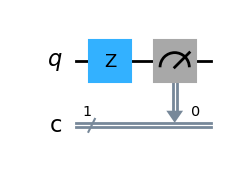

In [ ]:
# Create a circuit with 1 qubit and 1 classical bit
from qiskit import QuantumCircuit
qc = QuantumCircuit(1, 1)

# Apply a Hadamard gate to create a superposition: (|0⟩ + |1⟩)/√2 - 50%
qc.z(0)

# Measure the qubit
qc.measure(0, 0)

# Draw the circuit
qc.draw('mpl')



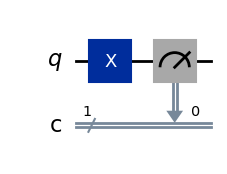

In [ ]:
from qiskit import QuantumCircuit
qc = QuantumCircuit(1,1)
qc.x(0)          # put qubit in superposition
qc.measure(0,0)
qc.draw('mpl')


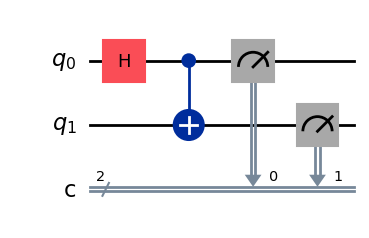

In [ ]:
qc = QuantumCircuit(2,2)
qc.h(0)          # create superposition
qc.cx(0,1)       # entangle qubits
qc.measure([0,1],[0,1])
qc.draw('mpl')

**    Addition**

Quantum Circuit:


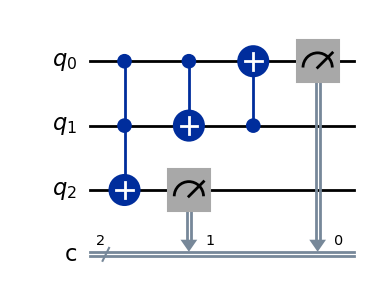


Measurement Counts: {'00': 1024}

Input: a=0, b=0
SUM   = 0
CARRY = 0
----------------------------------
Quantum Circuit:


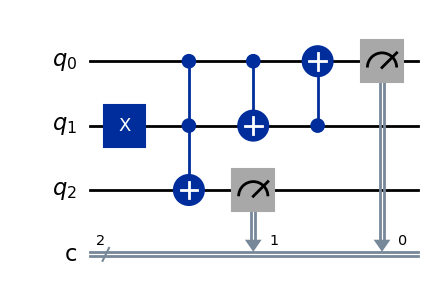


Measurement Counts: {'01': 1024}

Input: a=0, b=1
SUM   = 1
CARRY = 0
----------------------------------
Quantum Circuit:


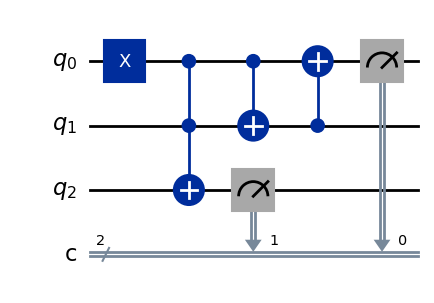


Measurement Counts: {'00': 1024}

Input: a=1, b=0
SUM   = 0
CARRY = 0
----------------------------------
Quantum Circuit:


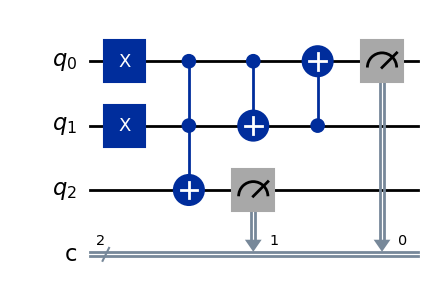


Measurement Counts: {'11': 1024}

Input: a=1, b=1
SUM   = 1
CARRY = 1
----------------------------------


In [ ]:
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator

def one_bit_adder(a, b):
    # 3 qubits, 2 classical bits
    qc = QuantumCircuit(3, 2)

    # Load inputs a and b using X gate
    if a == 1:
        qc.x(0)     # q0 = a
    if b == 1:
        qc.x(1)     # q1 = b

    # Compute CARRY = a AND b using CCNOT
    qc.ccx(0, 1, 2)

    # Compute SUM = a XOR b using two CNOTs
    qc.cx(0, 1)
    qc.cx(1, 0)

    # Measure SUM (q0) and CARRY (q2)
    qc.measure(0, 0)   # sum
    qc.measure(2, 1)   # carry

    # Draw the circuit using 'mpl' backend
    print("Quantum Circuit:")
    display(qc.draw('mpl'))

    # Simulate the circuit to get results
    simulator = AerSimulator()
    job = simulator.run(qc, shots=1024)
    result = job.result()
    counts = result.get_counts(qc)

    print("\nMeasurement Counts:", counts)

    # The classical bits are ordered as c[1]c[0], where c[1] is carry and c[0] is sum
    # The most frequent outcome is assumed for classical results
    # Example: {'00': 1024} means sum=0, carry=0
    # Example: {'01': 1024} means sum=1, carry=0
    # Example: {'10': 1024} means sum=0, carry=1

    # Get the most common outcome
    most_common_outcome = max(counts, key=counts.get)

    # Extract SUM and CARRY from the most common outcome string
    # Qiskit's counts format is usually 'c[n-1] ... c[1]c[0]', so for 2 bits, it's 'c1 c0'
    # where c1 is the bit from c[1] (carry) and c0 is the bit from c[0] (sum)
    carry_result = int(most_common_outcome[0]) # First bit is the result of classical bit 1 (carry)
    sum_result = int(most_common_outcome[1])   # Second bit is the result of classical bit 0 (sum)

    print(f"\nInput: a={a}, b={b}")
    print(f"SUM   = {sum_result}")
    print(f"CARRY = {carry_result}")
    print("----------------------------------")

# Test all input combinations
one_bit_adder(0,0)
one_bit_adder(0,1)
one_bit_adder(1,0)
one_bit_adder(1,1)

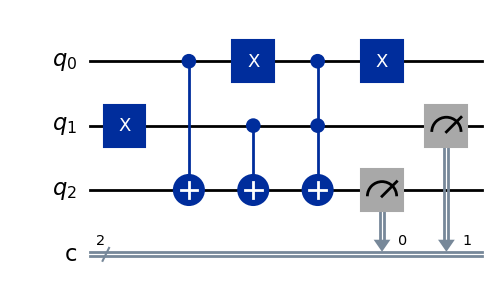

In [ ]:
# Install Qiskit if not already installed
#!pip install qiskit qiskit-ibm-provider --quiet

#from qiskit import QuantumCircuit, transpile
#from qiskit_ibm_provider import IBMProvider

# Create a quantum circuit with 3 qubits and 2 classical bits
qc = QuantumCircuit(3, 2)

# Set inputs (example: a=0, b=1)
a = 0
b = 1
if a == 1:
    qc.x(0)  # Set qubit q0 = a
if b == 1:
    qc.x(1)  # Set qubit q1 = b

# Step 1: Difference = a XOR b
qc.cx(0, 2)
qc.cx(1, 2)

# Step 2: Borrow = b AND (NOT a)
qc.x(0)          # NOT a
qc.ccx(0, 1, 2)  # Toffoli: controls = NOT a & b, target = q2
qc.x(0)          # Restore a

# Step 3: Measure
qc.measure(2, 0)  # difference
qc.measure(1, 1)  # borrow (for demonstration)

# Draw the circuit
display(qc.draw('mpl'))

### **Subtraction**

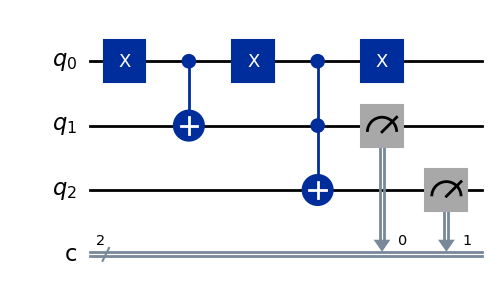

In [ ]:
from qiskit import QuantumCircuit

# q0 = A, q1 = B, q2 = Borrow
qc = QuantumCircuit(3, 2)

# Example input: A=1, B=0
qc.x(0)   # Set A = 1
# qc.x(1) # Uncomment to set B = 1

# DIFFERENCE = A XOR B -> store in B
qc.cx(0, 1)

# BORROW = NOT(A) AND B -> store in q2
qc.x(0)          # Make A = NOT(A)
qc.ccx(0, 1, 2)  # Borrow
qc.x(0)          # Undo the NOT on A

# Measure Difference (B) and Borrow (q2)
qc.measure(1, 0)
qc.measure(2, 1)

display(qc.draw('mpl'))

***DEUTSCH ALGORITHM***

Deutsch Algorithm Circuit:


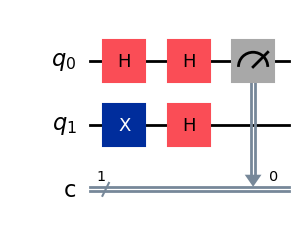


Statevector Probabilities:
{np.str_('00'): np.float64(0.4999999999999998), np.str_('01'): np.float64(2.5023402338326227e-34), np.str_('10'): np.float64(0.4999999999999998), np.str_('11'): np.float64(2.5023402338326227e-34)}

P(first qubit = 0): 1.0000
P(first qubit = 1): 0.0000

RESULT: The function is CONSTANT.


In [ ]:
# ============================================
# Deutsch Algorithm
# ============================================

# Install Qiskit (if needed)
!pip install qiskit --quiet
!pip install pylatexenc --quiet # Ensure pylatexenc is available for 'mpl' drawing

from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector

# --------------------------------------------
# Deutsch Algorithm Function
# --------------------------------------------

def deutsch_algorithm(oracle_fn):

    qc = QuantumCircuit(2, 1)  # 2 qubits, 1 classical bit

    # Step 1: Prepare |0>|1>
    qc.x(1)   # Put second qubit in |1>

    # Step 2: Apply Hadamards to both qubits
    qc.h(0)
    qc.h(1)

    # Step 3: Apply oracle
    oracle_fn(qc)

    # Step 4: Apply Hadamard to first qubit
    qc.h(0)

    # Step 5: Measure first qubit
    qc.measure(0, 0)

    return qc


# --------------------------------------------
# Four Deutsch Oracles
# --------------------------------------------

# Constant function f(x) = 0
def oracle_constant_0(qc):
    # Does nothing
    pass


# Constant function f(x) = 1
def oracle_constant_1(qc):
    qc.x(1)  # Flip second qubit


# Balanced function f(x) = x
def oracle_balanced_1(qc):
    qc.cx(0, 1)


# Balanced function f(x) = NOT(x)
def oracle_balanced_2(qc):
    qc.cx(0, 1)
    qc.x(1)


# --------------------------------------------
# Select an Oracle to Test
# --------------------------------------------

# Uncomment any one:
oracle = oracle_constant_0   # Constant
#oracle = oracle_constant_1   # Constant
#oracle = oracle_balanced_1   # Balanced
#oracle = oracle_balanced_2   # Balanced

# --------------------------------------------
# Build Circuit
# --------------------------------------------

qc = deutsch_algorithm(oracle)

print("Deutsch Algorithm Circuit:")
display(qc.draw('mpl'))

# --------------------------------------------
# Simulate Without Measurement (Statevector)
# --------------------------------------------

# Remove measurement for statevector simulation
qc_sv = qc.remove_final_measurements(inplace=False)

state = Statevector.from_instruction(qc_sv)
probs = state.probabilities_dict()

print("\nStatevector Probabilities:")
print(probs)

# --------------------------------------------
# Extract Probabilities of First Qubit
# --------------------------------------------

# In Qiskit: RIGHTMOST bit = first qubit
p0 = 0
p1 = 0

for bitstring, prob in probs.items():
    if bitstring[-1] == "0":
        p0 += prob
    else:
        p1 += prob

print(f"\nP(first qubit = 0): {p0:.4f}")
print(f"P(first qubit = 1): {p1:.4f}")

# --------------------------------------------
# Final Classification
# --------------------------------------------

if p0 > p1:
    print("\nRESULT: The function is CONSTANT.")
else:
    print("\nRESULT: The function is BALANCED.")

In [ ]:
# Ensure pylatexenc is installed in a separate step
!pip install pylatexenc --quiet
!pip install qiskit --quiet

# IMPORTANT: After running this cell, please restart the Colab runtime (Runtime -> Restart runtime)
# before proceeding to the Deutsch Algorithm cell.

Deutsch Algorithm Circuit:


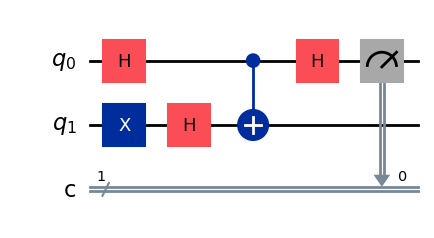


Statevector Probabilities:
{np.str_('00'): np.float64(5.286997409534849e-34), np.str_('01'): np.float64(0.4999999999999998), np.str_('10'): np.float64(5.286997409534849e-34), np.str_('11'): np.float64(0.4999999999999998)}

P(first qubit = 0): 0.0000
P(first qubit = 1): 1.0000

RESULT: The function is BALANCED.


In [ ]:
# ============================================
# Deutsch Algorithm (Google Colab Version)
# ============================================

from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector

# --------------------------------------------
# Deutsch Algorithm Function
# --------------------------------------------

def deutsch_algorithm(oracle_fn):

    qc = QuantumCircuit(2, 1)  # 2 qubits, 1 classical bit

    # Step 1: Prepare |0>|1>
    qc.x(1)   # Put second qubit in |1>

    # Step 2: Apply Hadamards to both qubits
    qc.h(0)
    qc.h(1)

    # Step 3: Apply oracle
    oracle_fn(qc)

    # Step 4: Apply Hadamard to first qubit
    qc.h(0)

    # Step 5: Measure first qubit
    qc.measure(0, 0)

    return qc


# --------------------------------------------
# Four Deutsch Oracles
# --------------------------------------------

# Constant function f(x) = 0
def oracle_constant_0(qc):
    # Does nothing
    pass


# Constant function f(x) = 1
def oracle_constant_1(qc):
    qc.x(1)  # Flip second qubit


# Balanced function f(x) = x
def oracle_balanced_1(qc):
    qc.cx(0, 1)


# Balanced function f(x) = NOT(x)
def oracle_balanced_2(qc):
    qc.cx(0, 1)
    qc.x(1)


# --------------------------------------------
# Select an Oracle to Test
# --------------------------------------------

# Uncomment any one:
#oracle = oracle_constant_0   # Constant
#oracle = oracle_constant_1   # Constant
oracle = oracle_balanced_1   # Balanced
#oracle = oracle_balanced_2   # Balanced

# --------------------------------------------
# Build Circuit
# --------------------------------------------

qc = deutsch_algorithm(oracle)

print("Deutsch Algorithm Circuit:")
display(qc.draw('mpl'))

# --------------------------------------------
# Simulate Without Measurement (Statevector)
# --------------------------------------------

# Remove measurement for statevector simulation
qc_sv = qc.remove_final_measurements(inplace=False)

state = Statevector.from_instruction(qc_sv)
probs = state.probabilities_dict()

print("\nStatevector Probabilities:")
print(probs)

# --------------------------------------------
# Extract Probabilities of First Qubit
# --------------------------------------------

# In Qiskit: RIGHTMOST bit = first qubit
p0 = 0
p1 = 0

for bitstring, prob in probs.items():
    if bitstring[-1] == "0":
        p0 += prob
    else:
        p1 += prob

print(f"\nP(first qubit = 0): {p0:.4f}")
print(f"P(first qubit = 1): {p1:.4f}")

# --------------------------------------------
# Final Classification
# --------------------------------------------

if p0 > p1:
    print("\nRESULT: The function is CONSTANT.")
else:
    print("\nRESULT: The function is BALANCED.")

Deutsch–Jozsa Circuit:


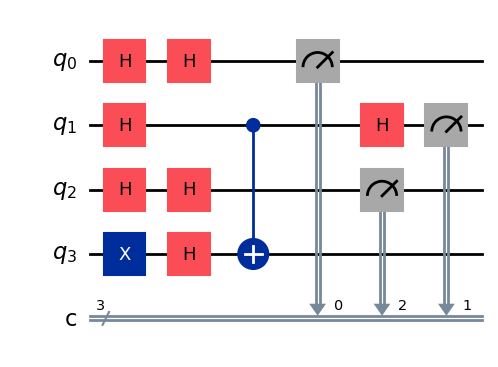


Measurement Counts:
{'010': 1024}

RESULT: The function is BALANCED.


In [ ]:
# ================================================
#  Deutsch–Jozsa Algorithm (General n-Qubit Version)
#  Fully Working Google Colab Code
# ================================================

!pip install qiskit --quiet

from qiskit import QuantumCircuit
from qiskit_aer import Aer  # Corrected import for Aer
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_histogram
import numpy as np
import matplotlib.pyplot as plt


# ------------------------------------------------
# 1. ORACLE GENERATORS
# ------------------------------------------------

def constant_oracle(n, value):
    """
    constant f(x)=value  for all x
    value = 0 or 1
    """
    qc = QuantumCircuit(n + 1)

    if value == 1:
        # flips output for all x
        qc.x(n)

    return qc


def balanced_oracle(n):
    """
    Balanced oracle: f(x)=parity of selected bits
    Builds a random balanced function
    """
    qc = QuantumCircuit(n + 1)

    # randomly choose a set of input qubits to XOR into the output
    bits = np.random.randint(0, 2, size=n)

    for i in range(n):
        if bits[i] == 1:
            qc.cx(i, n)

    return qc


# ------------------------------------------------
# 2. Deutsch–Jozsa Circuit Builder
# ------------------------------------------------

def deutsch_jozsa(n, oracle):
    qc = QuantumCircuit(n + 1, n)

    # Step 1: Initialize input to |0> and output to |1>
    qc.x(n)

    # Step 2: Apply Hadamard to all qubits
    qc.h(range(n + 1))

    # Step 3: Append oracle
    qc.compose(oracle, inplace=True)

    # Step 4: Apply Hadamard to the input qubits
    qc.h(range(n))

    # Step 5: Measure only the input qubits
    qc.measure(range(n), range(n))

    return qc


# ------------------------------------------------
# 3. RUN THE ALGORITHM
# ------------------------------------------------

# Choose number of input qubits
n = 3   # can change to 4, 5, 6...

# CHOOSE ORACLE
#oracle = constant_oracle(n, 0)
#oracle = constant_oracle(n, 1)
oracle = balanced_oracle(n)

# Build the full circuit
qc = deutsch_jozsa(n, oracle)

print("Deutsch–Jozsa Circuit:")
display(qc.draw('mpl'))


# ------------------------------------------------
# 4. SIMULATION
# ------------------------------------------------

backend = Aer.get_backend('aer_simulator')

job = backend.run(qc, shots=1024)
result = job.result()
counts = result.get_counts()

print("\nMeasurement Counts:")
print(counts)

plot_histogram(counts)
plt.show()


# ------------------------------------------------
# 5. INTERPRETATION RULE
# ------------------------------------------------

if list(counts.keys()) == ['0' * n]:
    print("\nRESULT: The function is CONSTANT.")
else:
    print("\nRESULT: The function is BALANCED.")

***Bernstein–Vazirani***

 Secret string s = 1010

⚙️  Bernstein–Vazirani Quantum Circuit:


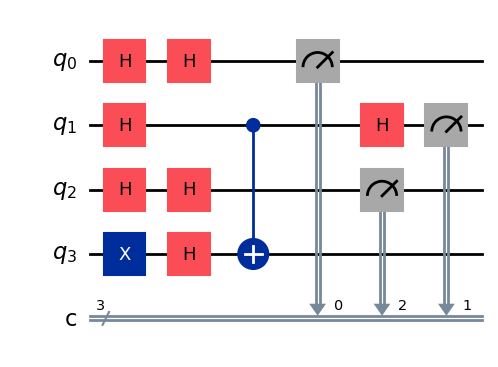


📊 Quantum measurement results (probabilities):
{np.str_('00000'): np.float64(6.6878453351142326e-68), np.str_('00001'): np.float64(3.9621727475551315e-35), np.str_('00010'): np.float64(8.339752955822669e-100), np.str_('00011'): np.float64(5.956763705216622e-68), np.str_('00100'): np.float64(2.7885301037217974e-34), np.str_('00101'): np.float64(0.4999999999999993), np.str_('00110'): np.float64(4.218689126202017e-67), np.str_('00111'): np.float64(9.071053470133416e-35), np.str_('01000'): np.float64(1.5677830096924779e-102), np.str_('01001'): np.float64(3.1697683532918522e-68), np.str_('01010'): np.float64(6.459277528811591e-135), np.str_('01011'): np.float64(9.79598057901174e-101), np.str_('01100'): np.float64(3.929945849977701e-68), np.str_('01101'): np.float64(1.814210694026673e-34), np.str_('01110'): np.float64(8.655721442128005e-103), np.str_('01111'): np.float64(2.8935620567503493e-68), np.str_('10000'): np.float64(6.6878453351142326e-68), np.str_('10001'): np.float64(3.96217274755

In [ ]:
# Install qiskit if not already installed
!pip install qiskit -q

from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt
import numpy as np

# Step 1️⃣ — Secret bit string
s = "1010"  # You can change this secret
n = len(s)
print(f" Secret string s = {s}")

# Step 2️⃣ — Create a Quantum Circuit
bv = QuantumCircuit(n + 1, n)

# Step 3️⃣ — Initialize output qubit to |1⟩ and apply Hadamard
bv.x(n)
bv.h(n)

# Step 4️⃣ — Apply Hadamard to all input qubits
for i in range(n):
    bv.h(i)

# Step 5️⃣ — Oracle for f(x) = s ⋅ x (mod 2)
for i in range(n):
    if s[i] == '1':
        bv.cx(i, n)

# Step 6️⃣ — Apply Hadamard again on input qubits
for i in range(n):
    bv.h(i)

# Step 7️⃣ — Measure input qubits
for i in range(n):
    bv.measure(i, i)

# Step 8️⃣ — Draw the circuit
print("\n⚙️  Bernstein–Vazirani Quantum Circuit:")
bv.draw(output='mpl')
display(qc.draw('mpl'))

plt.show()

# Step 9️⃣ — Simulate using Statevector (no Aer)
# Remove measurement to get the quantum state first
bv_no_measure = QuantumCircuit(n + 1)
bv_no_measure.x(n)
bv_no_measure.h(n)
for i in range(n):
    bv_no_measure.h(i)
for i in range(n):
    if s[i] == '1':
        bv_no_measure.cx(i, n)
for i in range(n):
    bv_no_measure.h(i)

# Get final statevector
final_state = Statevector.from_instruction(bv_no_measure)
# Measure probabilities (only first n qubits matter)
probs = final_state.probabilities_dict()

# Extract the most probable bitstring (the answer)
result = max(probs, key=probs.get)
detected_s = result[:n]

# Step 🔟 — Display result
print("\n📊 Quantum measurement results (probabilities):")
print(probs)

print(f"\n✅ Secret string found by the quantum algorithm = {detected_s}")


*** Bell state ***

{'11': 509, '00': 515}


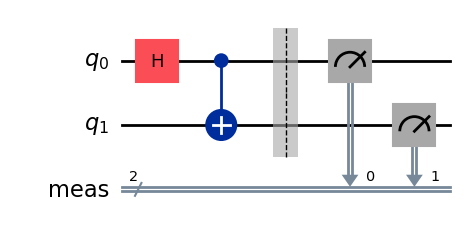

In [ ]:
from qiskit import QuantumCircuit
from qiskit_aer import Aer
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt

# Create a simple Bell state circuit
qc = QuantumCircuit(2)
qc.h(0)
qc.cx(0, 1)
qc.measure_all()

# Run on simulator
sim = Aer.get_backend('aer_simulator')
job = sim.run(qc, shots=1024)
result = job.result()
counts = result.get_counts()

# Display results
print(counts)
display(qc.draw('mpl'))

plot_histogram(counts)
plt.show()

***for phase estimation***

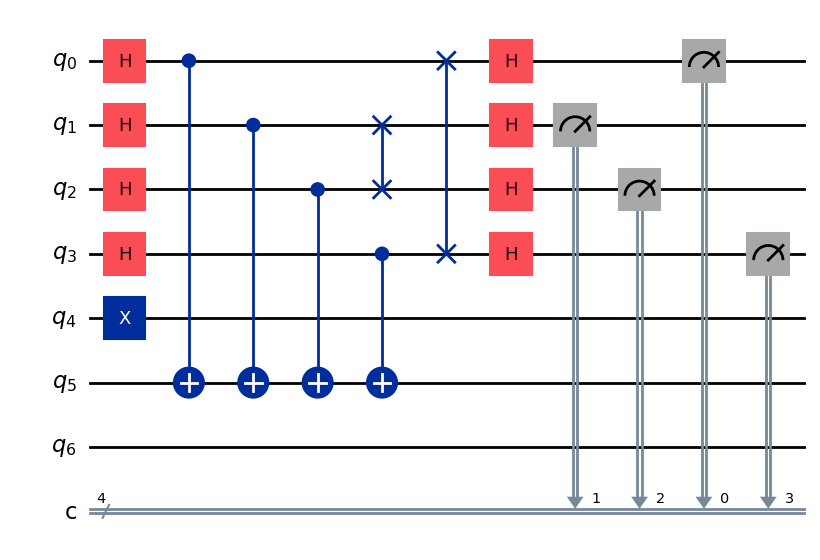

In [ ]:
# Number of counting qubits (for phase estimation)
n_count = 4

# Create a quantum circuit
qc = QuantumCircuit(n_count + 3, n_count)

# Step 1: Apply Hadamard gates to counting qubits (create superposition)
qc.h(range(n_count))

# Step 2: Initialize second register to |1>
qc.x(n_count)

# Step 3: Controlled modular exponentiation (conceptual)
# (For N=15, a=7 — just shown symbolically)
for q in range(n_count):
    qc.cx(q, n_count + 1)   # placeholder for controlled-U operations

# Step 4: Apply Inverse Quantum Fourier Transform (QFT⁻¹)
for j in range(n_count // 2):
    qc.swap(j, n_count - j - 1)
qc.h(range(n_count))

# Step 5: Measure counting qubits
qc.measure(range(n_count), range(n_count))

# Draw the circuit
qc.draw('mpl')
display(qc.draw('mpl'))
plt.show()


***Shor Algorithm ***

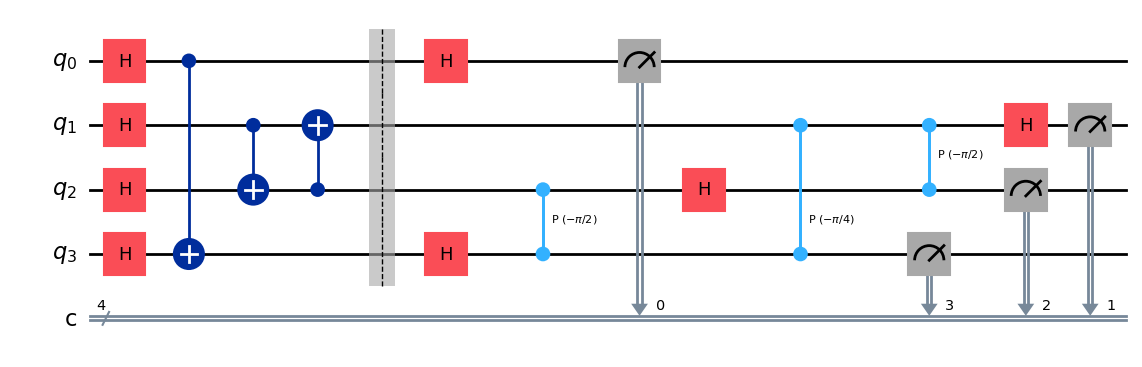

Possible factors of 15: (3, 5)


In [ ]:
# Import required libraries
from qiskit import QuantumCircuit, transpile
from qiskit.visualization import plot_histogram
from qiskit_aer import AerSimulator
from math import gcd
import numpy as np

# --------------------------
# Step 1: Define basic parameters
# --------------------------
N = 15    # Number to factor
a = 7     # Random co-prime integer with N

# Function to find classical factors after period r is found
def get_factors(N, a, r):
    if r % 2 != 0:
        return None
    factor1 = gcd(pow(a, r//2) - 1, N)
    factor2 = gcd(pow(a, r//2) + 1, N)
    if factor1 * factor2 == N:
        return factor1, factor2
    else:
        return None

# --------------------------
# Step 2: Build simple quantum circuit
# --------------------------
# This simplified circuit represents the quantum part that finds the period
qc = QuantumCircuit(4, 4)

# Apply Hadamard gates (superposition)
qc.h([0, 1, 2, 3])

# Example controlled unitary (placeholder for modular exponentiation)
qc.cx(0, 3)
qc.cx(1, 2)
qc.cx(2, 1)
qc.barrier()

# Apply inverse Quantum Fourier Transform (QFT†) approximation
qc.h(3)
qc.cp(-np.pi/2, 2, 3)
qc.h(2)
qc.cp(-np.pi/4, 1, 3)
qc.cp(-np.pi/2, 1, 2)
qc.h(1)
qc.h(0)

# Measure all qubits
qc.measure(range(4), range(4))

# Draw the circuit
qc.draw('mpl')
display(qc.draw('mpl'))

# Example of classical step after finding period r
r = 4  # For N=15, a=7, we expect r=4
factors = get_factors(N, a, r)
print(f"Possible factors of {N}: {factors}")



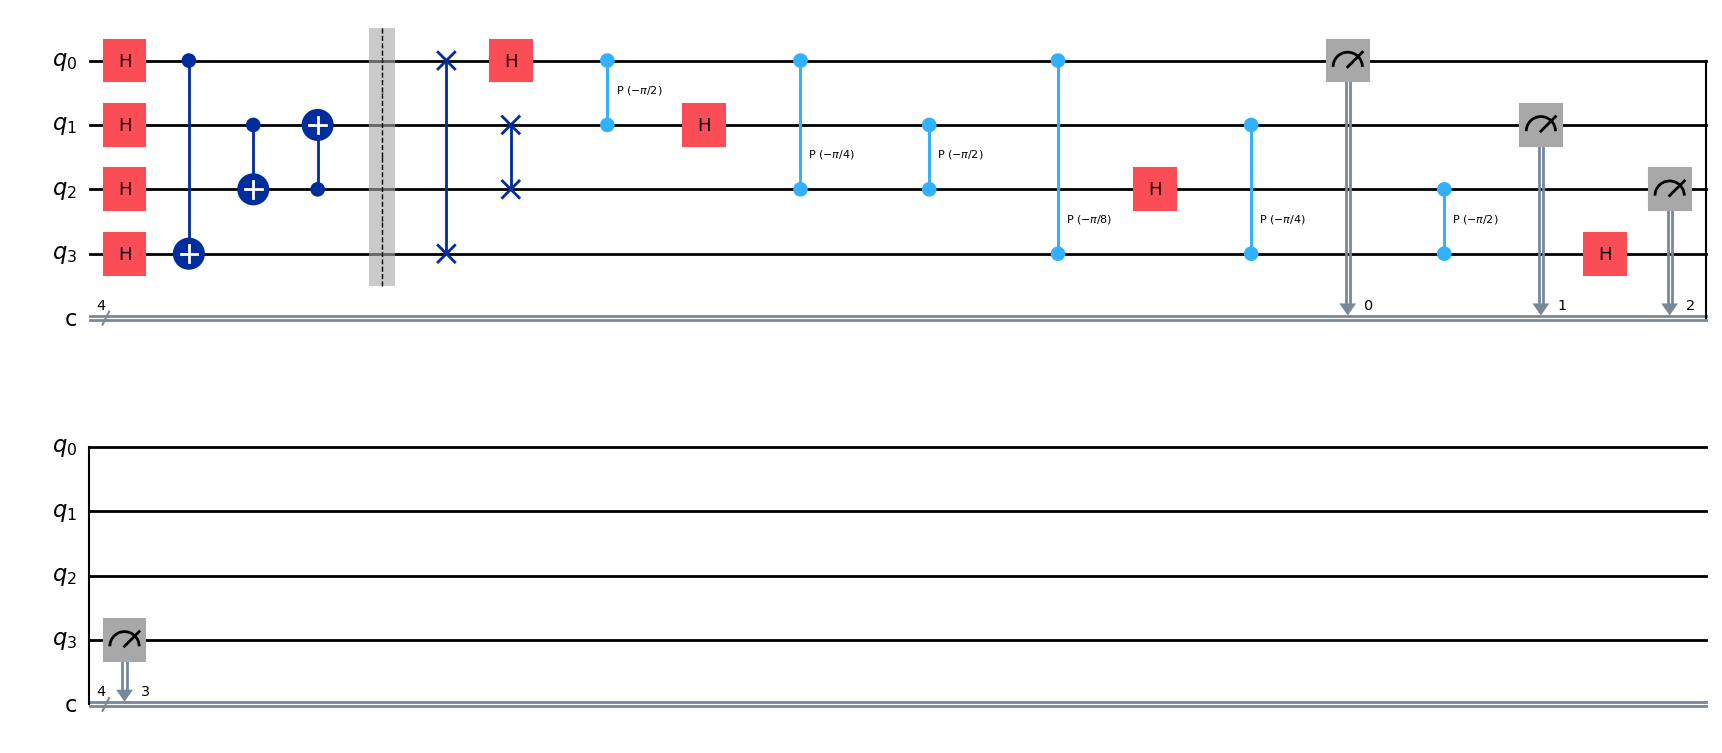

In [ ]:
from qiskit import QuantumCircuit
import numpy as np

# Number to factor
N = 15
a = 7  # Random integer co-prime with N

def qft_dagger(qc, n):
    """Inverse QFT on the first n qubits of qc."""
    for qubit in range(n//2):
        qc.swap(qubit, n-qubit-1)
    for j in range(n):
        for m in range(j):
            qc.cp(-np.pi/float(2**(j-m)), m, j)
        qc.h(j)

# Create a 4-qubit quantum circuit
qc = QuantumCircuit(4, 4)

# Apply Hadamard gates (superposition)
qc.h(range(4))

# Example controlled unitary (simulating modular exponentiation)
qc.cx(0, 3)
qc.cx(1, 2)
qc.cx(2, 1)

qc.barrier()

# Apply inverse QFT
qft_dagger(qc, 4)

# Measure all qubits
qc.measure(range(4), range(4))

# Draw the circuit
qc.draw('mpl')

Running Shor's algorithm (manual) for N=15, a=7 ... (this may take a few seconds)


ERROR:stevedore.extension:Could not load 'ibm_backend': cannot import name 'ProviderV1' from 'qiskit.providers' (/usr/local/lib/python3.12/dist-packages/qiskit/providers/__init__.py)
ERROR:stevedore.extension:Could not load 'ibm_dynamic_circuits': cannot import name 'ProviderV1' from 'qiskit.providers' (/usr/local/lib/python3.12/dist-packages/qiskit/providers/__init__.py)
ERROR:stevedore.extension:Could not load 'ibm_backend': cannot import name 'ProviderV1' from 'qiskit.providers' (/usr/local/lib/python3.12/dist-packages/qiskit/providers/__init__.py)
ERROR:stevedore.extension:Could not load 'ibm_dynamic_circuits': cannot import name 'ProviderV1' from 'qiskit.providers' (/usr/local/lib/python3.12/dist-packages/qiskit/providers/__init__.py)



--- Results ---
Measured bitstring (most frequent): 00000000
Q (2^t): 256  t: 8  m: 4
Counts (top 6): [('00000000', 991), ('11111111', 827), ('10000000', 815), ('01111111', 477), ('01000000', 415), ('11000000', 100)]
Potential r denominators from continued-fraction search: [1]
r candidate: 1
Success: False
Factors (if success): None

Quantum circuit used (text):
      ┌───┐                                                            »
 q_0: ┤ H ├─────■──────────────────────────────────────────────────────»
      ├───┤     │                                                      »
 q_1: ┤ H ├─────┼───────────■──────────────────────────────────────────»
      ├───┤     │           │                                          »
 q_2: ┤ H ├─────┼───────────┼───────────■──────────────────────────────»
      ├───┤     │           │           │                              »
 q_3: ┤ H ├─────┼───────────┼───────────┼───────────■──────────────────»
      ├───┤     │           │           │         

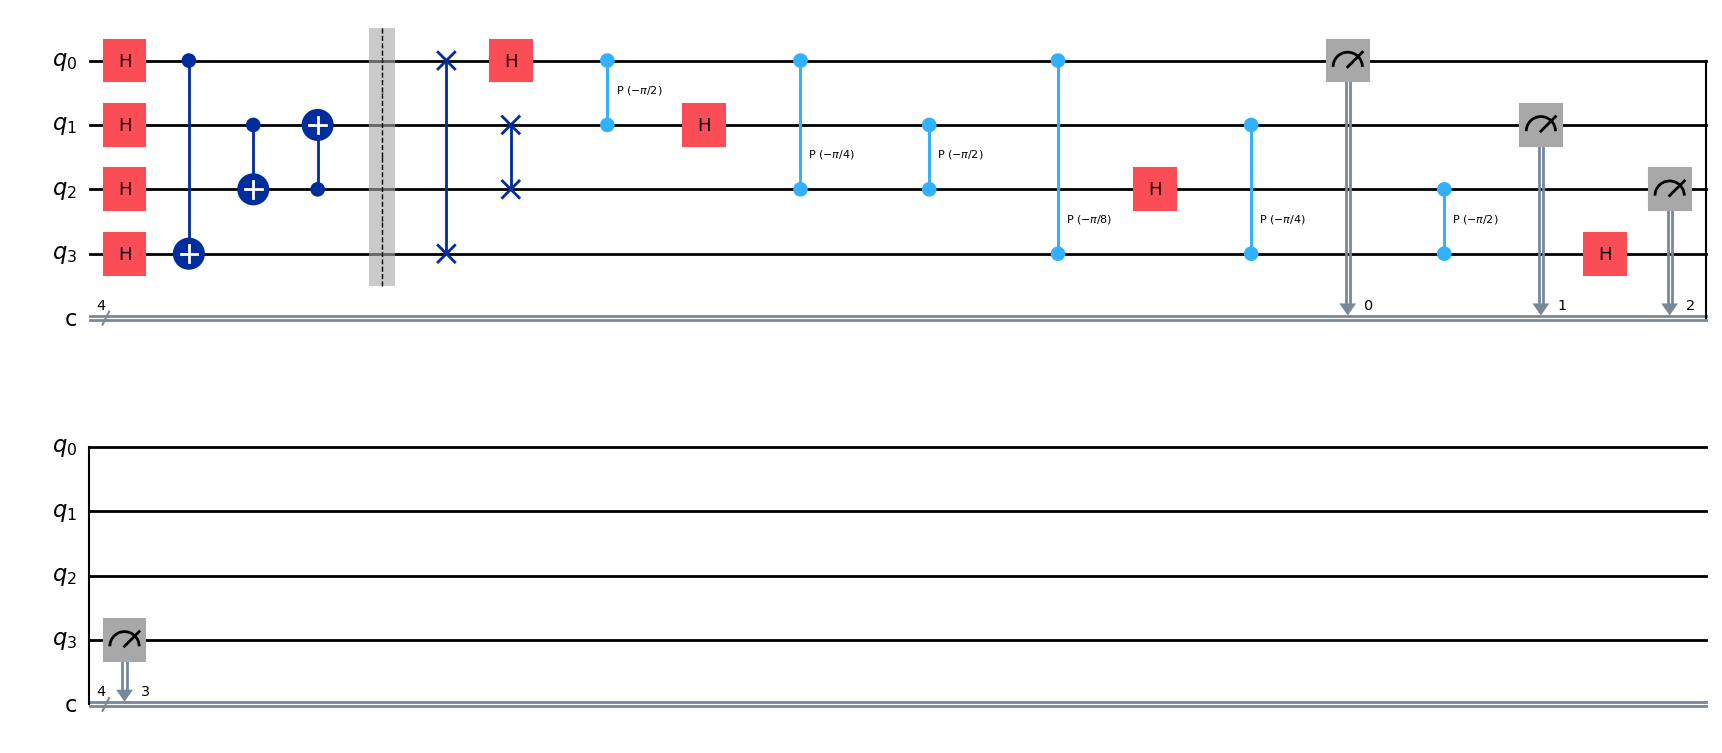

In [ ]:
# Shor from scratch (Colab-ready)
# - Manual QFT / inverse QFT
# - Controlled modular multiplication built from permutation unitary matrices
# - Period finding and classical postprocessing
# Works well for small N (example: N=15)

!pip install qiskit --quiet

import math
import numpy as np
from fractions import Fraction
from qiskit import QuantumCircuit, transpile
from qiskit_aer import Aer # Corrected import for Aer
from qiskit.circuit.library import UnitaryGate # Corrected import for UnitaryGate

# -----------------------------
# Utility: continued fractions to get denominator r from measured value
# -----------------------------
def continued_fraction(x, max_den=500):
    return Fraction(x).limit_denominator(max_den)

def find_r_from_fraction(meas, Q, N, max_den=500):
    frac = continued_fraction(meas/Q, max_den)
    r = frac.denominator
    return r

# -----------------------------
# Manual QFT and inverse QFT (on qubit indices list qreg)
# -----------------------------
def qft_circuit(qc, qreg):
    n = len(qreg)
    for j in range(n):
        qc.h(qreg[j])
        for k in range(1, n-j):
            angle = np.pi / (2**k)
            qc.cp(angle, qreg[j+k], qreg[j])
    # reverse order (do swaps)
    for i in range(n//2):
        qc.swap(qreg[i], qreg[n-1-i])
    return qc

def inverse_qft_circuit(qc, qreg):
    n = len(qreg)
    # swaps
    for i in range(n//2):
        qc.swap(qreg[i], qreg[n-1-i])
    for j in range(n-1, -1, -1):
        for k in range(n-j-1, 0, -1):
            angle = -np.pi / (2**k)
            qc.cp(angle, qreg[j+k], qreg[j])
        qc.h(qreg[j])
    return qc

# -----------------------------
# Build permutation unitary for multiplication by factor mod N on m qubits
# The unitary acts on m qubits where m = ceil(log2 N). For basis states y >= N we leave them unchanged.
# -----------------------------
def mul_mod_N_unitary(a, N, m):
    dim = 2**m
    mat = np.zeros((dim, dim), dtype=complex)
    for y in range(dim):
        if y < N:
            y2 = (a * y) % N
            mat[y2, y] = 1.0
        else:
            # keep unchanged for out-of-range basis states
            mat[y, y] = 1.0
    return mat

# -----------------------------
# Build controlled modular multiplication gate U_{a^{2^k} mod N}
# Returns an (1 control)-controlled gate acting on m target qubits (we will use gate.control())
# -----------------------------
def controlled_mul_mod_gate(a_pow, N, m):
    U = mul_mod_N_unitary(a_pow, N, m)
    gate = UnitaryGate(U)
    return gate

# -----------------------------
# Period-finding quantum routine
# Inputs:
#  - N: number to factor
#  - a: base with gcd(a,N)=1
#  - t: number of exponent qubits (choose t so Q = 2^t >= N^2)
# -----------------------------
def shor_period_finding(N, a, t=None, shots=1024):
    # size of value register
    m = math.ceil(math.log2(N))
    # choose t such that Q=2^t >= N^2
    if t is None:
        t = math.ceil(2*m)
    Q = 2**t

    # Build circuit: t exponent qubits, m value qubits
    qc = QuantumCircuit(t + m, t)

    exp_qubits = list(range(t))
    val_qubits = list(range(t, t+m))

    # initialize value register to |1>
    qc.x(val_qubits[0])  # |1> in little-endian ordering

    # apply H to exponent register to create superposition
    qc.h(exp_qubits)

    # For each exponent qubit j (least significant to most), apply controlled U_{a^{2^j} mod N}
    for j in range(t):
        a_pow = pow(a, 2**j, N)
        Umat = mul_mod_N_unitary(a_pow, N, m)
        Ugate = UnitaryGate(Umat)
        # create controlled version with one control (control qubit is exponent qubit j)
        controlledU = Ugate.control(1)
        # controlledU expects control then target qubits
        # Build list: control qubit, then value qubits
        qc.append(controlledU, [exp_qubits[j]] + val_qubits)

    # Apply inverse QFT on exponent register
    inverse_qft_circuit(qc, exp_qubits)

    # Measure exponent register
    qc.measure(exp_qubits, range(t))

    # Run on Aer
    backend = Aer.get_backend('aer_simulator')
    transpiled = transpile(qc, backend)
    job = backend.run(transpiled, shots=shots)
    result = job.result()
    counts = result.get_counts()

    return qc, counts, Q, t, m

# -----------------------------
# Classical post-processing: from measured y to candidate r, then factors
# -----------------------------
def postprocess_counts(counts, Q, N, a, t, shots=1024):
    # choose the most probable measurement outcome
    measured = max(counts.items(), key=lambda kv: kv[1])[0]  # bitstring of length t (qiskit ordering)
    # convert to integer (Qiskit returns bitstrings with qubit0 as leftmost; measurement mapping uses that convention)
    y = int(measured[::-1], 2)  # reverse because our measurement bits map little-endian; reverse to get integer
    # Try continued fractions to get r
    frac = Fraction(y, Q).limit_denominator(N)
    r_candidate = frac.denominator

    # attempt multiple denominators from continued fraction convergents (try robustness)
    potential_rs = set()
    # generate convergents
    convs = []
    # use a loop to try limit denominators increasing
    for denom in range(1, N+1):
        frac_try = Fraction(y, Q).limit_denominator(denom)
        r_c = frac_try.denominator
        if r_c > 0 and r_c < N:
            potential_rs.add(r_c)

    potential_rs = sorted(list(potential_rs))
    # Validate candidate r's
    for r in potential_rs:
        if r % 2 != 0:
            continue
        # check a^r mod N == 1
        if pow(a, r, N) == 1:
            # compute factors
            x = pow(a, r//2, N)
            p = math.gcd(x-1, N)
            q = math.gcd(x+1, N)
            if 1 < p < N and 1 < q < N and p*q == N:
                return True, r, (p, q), measured, potential_rs
    return False, r_candidate, None, measured, potential_rs

# -----------------------------
# Driver function: run full Shor flow for chosen N and a
# -----------------------------
def shor(N, a, shots=2048, max_attempts=5):
    if math.gcd(a, N) != 1:
        return {"status":"gcd_not_one", "gcd":math.gcd(a,N)}

    success = False
    r = None
    factors = None
    measured = None
    pot_rs = None
    qc_final = None

    for attempt in range(max_attempts):
        qc, counts, Q, t, m = shor_period_finding(N, a, shots=shots)
        success, r, factors, measured, pot_rs = postprocess_counts(counts, Q, N, a, t, shots=shots)
        if success:
            qc_final = qc # Store the successful circuit
            break

    return {
        "circuit": qc_final if qc_final else qc, # Return the last circuit if no success
        "counts": counts,
        "Q": Q,
        "t": t,
        "m": m,
        "measured": measured,
        "potential_rs": pot_rs,
        "success": success,
        "r": r,
        "factors": factors
    }

# -----------------------------
# Example run for N=15
# -----------------------------
N = 15
a = 7  # choose a with gcd(a,N)=1

print(f"Running Shor's algorithm (manual) for N={N}, a={a} ... (this may take a few seconds)")

res = shor(N, a, shots=4096, max_attempts=10) # Increased attempts

print("\n--- Results ---")
print("Measured bitstring (most frequent):", res["measured"])
print("Q (2^t):", res["Q"], " t:", res["t"], " m:", res["m"])
print("Counts (top 6):", sorted(res["counts"].items(), key=lambda kv:-kv[1])[:6])
print("Potential r denominators from continued-fraction search:", res["potential_rs"])
print("r candidate:", res["r"])
print("Success:", res["success"])
print("Factors (if success):", res["factors"])

# Show circuit
print("\nQuantum circuit used (text):")
print(res["circuit"].draw("text"))

**Groover**

In [ ]:
# Step 1️⃣: Import modules
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator # Changed to AerSimulator

# Step 2️⃣: Create the oracle that marks |11⟩
oracle = QuantumCircuit(2, name='Oracle')
oracle.cz(0, 1)  # Flip phase of |11⟩
oracle.draw('text')

# Step 3️⃣: Create the diffuser (amplitude amplifier)
diffuser = QuantumCircuit(2, name='Diffuser')
diffuser.h([0, 1])
diffuser.x([0, 1])
diffuser.h(1)
diffuser.cx(0, 1)
diffuser.h(1)
diffuser.x([0, 1])
diffuser.h([0, 1])
diffuser.draw('text')

# Step 4️⃣: Build Grover (Amplitude Amplification) circuit
grover = QuantumCircuit(2, 2)
grover.h([0, 1])  # Create superposition
grover.compose(oracle, inplace=True)
grover.compose(diffuser, inplace=True)
grover.measure([0, 1], [0, 1])
grover.draw('mpl')

# Step 5️⃣: Run on AerSimulator
sim = AerSimulator() # Changed to AerSimulator
compiled = transpile(grover, sim)
result = sim.run(compiled, shots=1000).result()
counts = result.get_counts()

print("Measurement counts:", counts)

ERROR:stevedore.extension:Could not load 'ibm_backend': cannot import name 'ProviderV1' from 'qiskit.providers' (/usr/local/lib/python3.12/dist-packages/qiskit/providers/__init__.py)
ERROR:stevedore.extension:Could not load 'ibm_dynamic_circuits': cannot import name 'ProviderV1' from 'qiskit.providers' (/usr/local/lib/python3.12/dist-packages/qiskit/providers/__init__.py)
ERROR:stevedore.extension:Could not load 'ibm_backend': cannot import name 'ProviderV1' from 'qiskit.providers' (/usr/local/lib/python3.12/dist-packages/qiskit/providers/__init__.py)
ERROR:stevedore.extension:Could not load 'ibm_dynamic_circuits': cannot import name 'ProviderV1' from 'qiskit.providers' (/usr/local/lib/python3.12/dist-packages/qiskit/providers/__init__.py)


Measurement counts: {'11': 1000}


Grover Circuit:


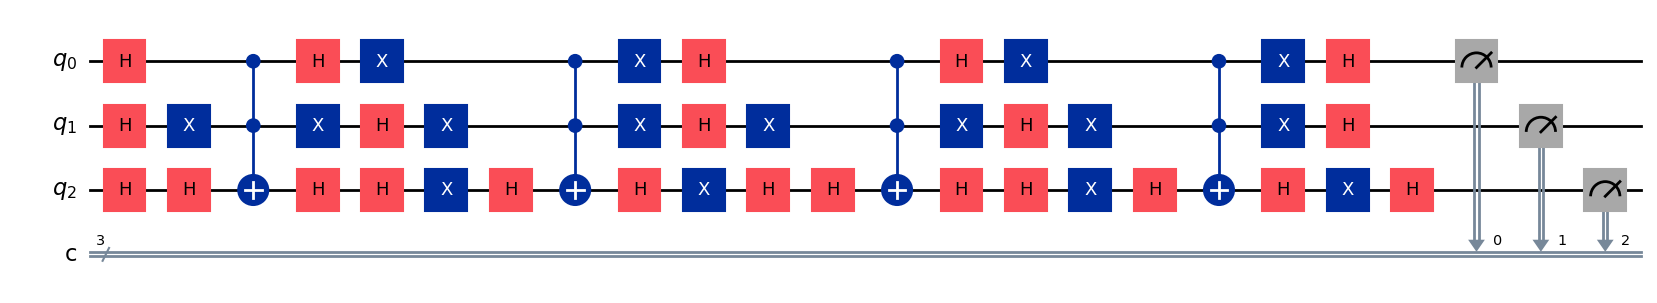


Measurement Results:
{'110': 4, '100': 8, '000': 4, '010': 9, '001': 9, '111': 9, '011': 9, '101': 972}

Expected Target: |101> (Decimal: 5)
Most Common Outcome: |101>
Grover's algorithm successfully found the target state!


In [ ]:
# Install Qiskit
!pip install qiskit --quiet

from qiskit import QuantumCircuit
from qiskit_aer import Aer # Corrected import for Aer
import numpy as np

# -----------------------------------
# 1. Create Oracle for target state |x*>
# -----------------------------------

def grover_oracle(n, target):
    qc = QuantumCircuit(n)
    target_bin = format(target, f'0{n}b')

    # Flip bits where target has 0
    for i, bit in enumerate(target_bin):
        if bit == '0':
            qc.x(i)

    # Multi-controlled Z gate (Z on last qubit)
    # This is implemented as H-MCX-H
    qc.h(n-1)
    # mcx needs control qubits as a list, and then the target qubit
    if n > 1: # only apply mcx if there are control qubits
        qc.mcx(list(range(n-1)), n-1)
    qc.h(n-1)

    # Undo bit flips
    for i, bit in enumerate(target_bin):
        if bit == '0':
            qc.x(i)

    return qc


# -----------------------------------
# 2. Grover Diffusion Operator
# -----------------------------------

def diffusion_operator(n):
    qc = QuantumCircuit(n)

    qc.h(range(n))
    qc.x(range(n))

    # Multi-controlled Z gate for the |0...0> state
    qc.h(n-1)
    if n > 1: # only apply mcx if there are control qubits
        qc.mcx(list(range(n-1)), n-1)
    qc.h(n-1)

    qc.x(range(n))
    qc.h(range(n))

    return qc


# -----------------------------------
# 3. Full Grover Algorithm
# -----------------------------------

def grover_search(n, target):
    qc = QuantumCircuit(n, n)

    # Step 1: Create uniform superposition
    qc.h(range(n))

    # Number of iterations
    N_states = 2 ** n
    # Calculate optimal number of iterations based on N_states and M (number of marked states, here M=1)
    # Formula: round(pi/4 * sqrt(N/M)) -> for M=1, round(pi/4 * sqrt(N))
    iterations = int(np.floor(np.pi/4 * np.sqrt(N_states)))

    oracle_circuit = grover_oracle(n, target)
    diffuser_circuit = diffusion_operator(n)

    # Step 2: Grover Iterations
    for _ in range(iterations):
        # Use qc.compose() instead of qc.append(to_gate()) for better compatibility with Aer
        qc.compose(oracle_circuit, inplace=True, qubits=range(n))
        qc.compose(diffuser_circuit, inplace=True, qubits=range(n))

    qc.measure(range(n), range(n))
    return qc


# -----------------------------------
# 4. Test Grover (example: search for |101> = 5)
# -----------------------------------

n = 3
target = 5   # state |101> (binary '101')
qc = grover_search(n, target)

print("Grover Circuit:")
display(qc.draw('mpl'))

backend = Aer.get_backend('qasm_simulator')
result = backend.run(qc, shots=1024).result() # Updated to use backend.run
counts = result.get_counts()

print("\nMeasurement Results:")
print(counts)

# Verify if the target state was found with high probability
most_common_outcome = max(counts, key=counts.get)
expected_outcome = format(target, f'0{n}b')

print(f"\nExpected Target: |{expected_outcome}> (Decimal: {target})")
print(f"Most Common Outcome: |{most_common_outcome}>")

if most_common_outcome == expected_outcome:
    print("Grover's algorithm successfully found the target state!")
else:
    print("Grover's algorithm did not find the target state with highest probability.")

Step 2: After Hadamard (Superposition State)


┌───┐
q_0: ┤ H ├
     ├───┤
q_1: ┤ H ├
     └───┘

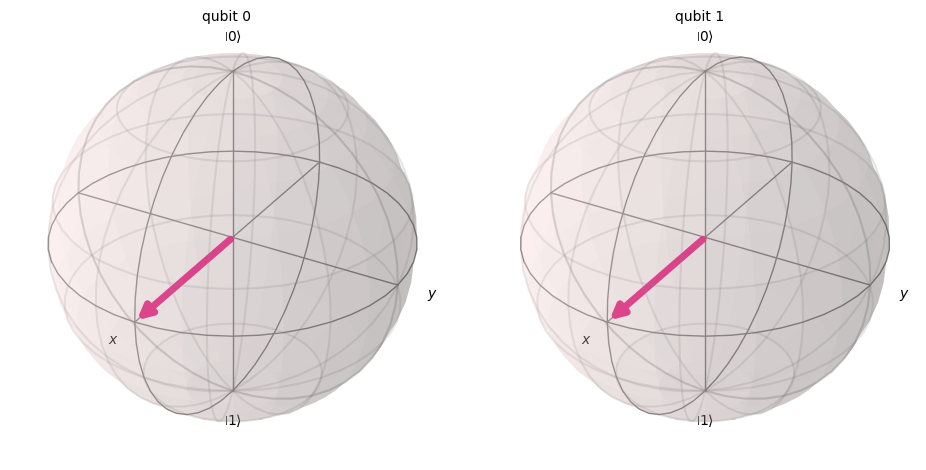

Step 3: Oracle (Marks |11⟩)


q_0: ─■─
      │ 
q_1: ─■─

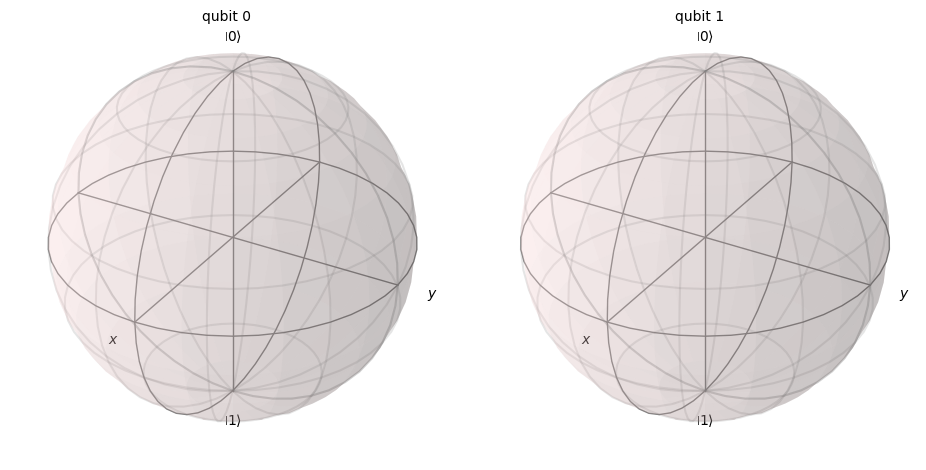

Step 4: Diffusion Operator


┌───┐┌───┐          ┌───┐┌───┐     
q_0: ┤ H ├┤ X ├───────■──┤ X ├┤ H ├─────
     ├───┤├───┤┌───┐┌─┴─┐├───┤├───┤┌───┐
q_1: ┤ H ├┤ X ├┤ H ├┤ X ├┤ H ├┤ X ├┤ H ├
     └───┘└───┘└───┘└───┘└───┘└───┘└───┘

Step 5: Full Circuit after One Grover Iteration


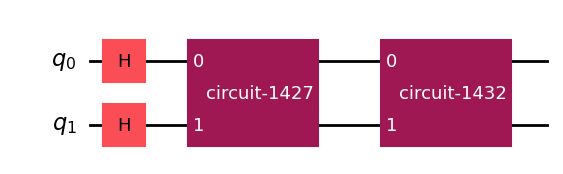

Final Statevector (Amplitudes)
Statevector([ 1.14967359e-17+0.j,  6.44130305e-17+0.j,  2.49659997e-17+0.j,
             -1.00000000e+00+0.j],
            dims=(2, 2))


In [ ]:
# Step-by-step Grover's Algorithm (2 qubits)
# ✅ Works without AerSimulator

from qiskit import QuantumCircuit
from qiskit.visualization import plot_bloch_multivector, plot_histogram
from qiskit.quantum_info import Statevector
import matplotlib.pyplot as plt

# Step 1️⃣ Create 2-qubit circuit
qc = QuantumCircuit(2)

# Step 2️⃣ Apply Hadamard to all qubits to create superposition
qc.h([0, 1])
print("Step 2: After Hadamard (Superposition State)")
display(qc.draw('text'))

# View statevector
state = Statevector.from_instruction(qc)
display(plot_bloch_multivector(state))

# Step 3️⃣ Oracle (marks |11⟩ as the target state)
oracle = QuantumCircuit(2)
oracle.cz(0, 1)  # Flip the phase of |11⟩
print("Step 3: Oracle (Marks |11⟩)")
display(oracle.draw('text'))

# Apply Oracle
qc.append(oracle, [0, 1])
state = Statevector.from_instruction(qc)
display(plot_bloch_multivector(state))

# Step 4️⃣ Diffusion Operator (Inversion about the mean)
diffusion = QuantumCircuit(2)
diffusion.h([0, 1])
diffusion.x([0, 1])
diffusion.h(1)
diffusion.cx(0, 1)
diffusion.h(1)
diffusion.x([0, 1])
diffusion.h([0, 1])
print("Step 4: Diffusion Operator")
display(diffusion.draw('text'))

# Apply Diffusion Operator
qc.append(diffusion, [0, 1])
print("Step 5: Full Circuit after One Grover Iteration")
display(qc.draw('mpl'))

# Step 6️⃣ Final State Visualization
state = Statevector.from_instruction(qc)
print("Final Statevector (Amplitudes)")
print(state)

# Step 7️⃣ Plot Measurement Probabilities
probs = state.probabilities_dict()
plot_histogram(probs)
plt.show()


Grover’s Algorithm Circuit for 2 Qubits:


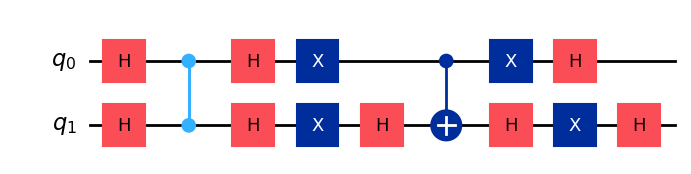

In [ ]:
from qiskit import QuantumCircuit
from qiskit.visualization import plot_histogram
from qiskit.quantum_info import Statevector
import matplotlib.pyplot as plt

# Step 1️⃣: Create 2-qubit circuit
qc = QuantumCircuit(2)

# Step 2️⃣: Apply Hadamard to create superposition
qc.h([0, 1])

# Step 3️⃣: Oracle – mark |11⟩ by flipping its phase
oracle = QuantumCircuit(2)
oracle.cz(0, 1)  # Controlled-Z gate flips phase of |11⟩

# Step 4️⃣: Diffusion operator (Inversion about mean)
diffusion = QuantumCircuit(2)
diffusion.h([0, 1])
diffusion.x([0, 1])
diffusion.h(1)
diffusion.cx(0, 1)
diffusion.h(1)
diffusion.x([0, 1])
diffusion.h([0, 1])

# Step 5️⃣: Combine them: Initialization → Oracle → Diffusion
grover_circuit = qc.compose(oracle).compose(diffusion)

# Step 6️⃣: Display circuit
print("Grover’s Algorithm Circuit for 2 Qubits:")
grover_circuit.draw("mpl")


## **Quantum Teleportation**

ERROR:stevedore.extension:Could not load 'ibm_backend': cannot import name 'ProviderV1' from 'qiskit.providers' (/usr/local/lib/python3.12/dist-packages/qiskit/providers/__init__.py)
ERROR:stevedore.extension:Could not load 'ibm_dynamic_circuits': cannot import name 'ProviderV1' from 'qiskit.providers' (/usr/local/lib/python3.12/dist-packages/qiskit/providers/__init__.py)
ERROR:stevedore.extension:Could not load 'ibm_backend': cannot import name 'ProviderV1' from 'qiskit.providers' (/usr/local/lib/python3.12/dist-packages/qiskit/providers/__init__.py)
ERROR:stevedore.extension:Could not load 'ibm_dynamic_circuits': cannot import name 'ProviderV1' from 'qiskit.providers' (/usr/local/lib/python3.12/dist-packages/qiskit/providers/__init__.py)
ERROR:stevedore.extension:Could not load 'ibm_backend': cannot import name 'ProviderV1' from 'qiskit.providers' (/usr/local/lib/python3.12/dist-packages/qiskit/providers/__init__.py)
ERROR:stevedore.extension:Could not load 'ibm_dynamic_circuits': ca

Histogram for Alice's outcome: 00
Histogram for Alice's outcome: 01


ERROR:stevedore.extension:Could not load 'ibm_backend': cannot import name 'ProviderV1' from 'qiskit.providers' (/usr/local/lib/python3.12/dist-packages/qiskit/providers/__init__.py)
ERROR:stevedore.extension:Could not load 'ibm_dynamic_circuits': cannot import name 'ProviderV1' from 'qiskit.providers' (/usr/local/lib/python3.12/dist-packages/qiskit/providers/__init__.py)
ERROR:stevedore.extension:Could not load 'ibm_backend': cannot import name 'ProviderV1' from 'qiskit.providers' (/usr/local/lib/python3.12/dist-packages/qiskit/providers/__init__.py)
ERROR:stevedore.extension:Could not load 'ibm_dynamic_circuits': cannot import name 'ProviderV1' from 'qiskit.providers' (/usr/local/lib/python3.12/dist-packages/qiskit/providers/__init__.py)
ERROR:stevedore.extension:Could not load 'ibm_backend': cannot import name 'ProviderV1' from 'qiskit.providers' (/usr/local/lib/python3.12/dist-packages/qiskit/providers/__init__.py)
ERROR:stevedore.extension:Could not load 'ibm_dynamic_circuits': ca

Histogram for Alice's outcome: 10
Histogram for Alice's outcome: 11


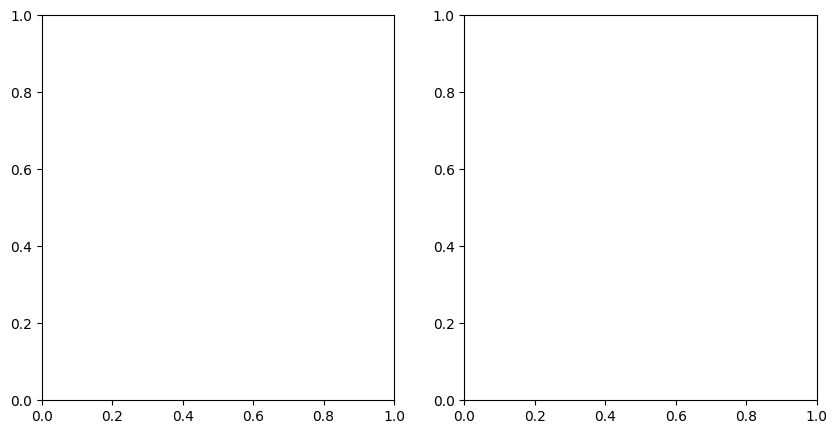

In [ ]:
# ============================================================
# 🚀 Quantum Teleportation + Bloch Sphere Comparison (Colab Ready)
# ============================================================

!pip install qiskit pylatexenc --quiet

# Imports
import warnings
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, transpile
from qiskit_aer import AerSimulator
from qiskit.quantum_info import Statevector, partial_trace, DensityMatrix # Import partial_trace and DensityMatrix
from qiskit.visualization import plot_bloch_multivector, plot_histogram
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
import numpy as np

# Filter out specific stevedore warnings related to IBM providers
warnings.filterwarnings("ignore", message="Could not load 'ibm_backend': cannot import name 'ProviderV1' from 'qiskit.providers'", category=UserWarning)
warnings.filterwarnings("ignore", message="Could not load 'ibm_dynamic_circuits': cannot import name 'ProviderV1' from 'qiskit.providers'", category=UserWarning)

# ============================================================
# 🔹 Step 1 – Create the Circuit
# ============================================================
q = QuantumRegister(3, "q")
c = ClassicalRegister(2, "c")
qc = QuantumCircuit(q, c)

# Prepare message |ψ⟩ = (|0⟩ + |1⟩)/√2
qc.h(0)
qc.barrier()

# Create entanglement between q1 and q2
qc.h(1)
qc.cx(1, 2)
qc.barrier()

# Alice’s operations
qc.cx(0, 1)
qc.h(0)
qc.barrier()

# Measurement
qc.measure([0, 1], [0, 1])
qc.barrier()

# Display circuit
qc.draw("mpl")
plt.show()

# ============================================================
# 🔹 Step 2 – Simulation (before correction)
# ============================================================
state = Statevector.from_label("000")
state = state.evolve(qc.remove_final_measurements(inplace=False))

# ============================================================
# 🔹 Step 3 – Simulate Bob’s corrected state and plot histograms separately
# ============================================================
sim = AerSimulator()
results = {}

for outcome, gates in {
    "00": [],
    "01": ["x"],
    "10": ["z"],
    "11": ["z", "x"],
}.items():
    circ_copy = qc.copy()
    for g in gates:
        if g == "x":
            circ_copy.x(2)
        elif g == "z":
            circ_copy.z(2)
    compiled = transpile(circ_copy, sim)
    result = sim.run(compiled, shots=1024).result() # Added shots
    counts = result.get_counts()
    results[outcome] = counts # Store Counts object (plot_histogram can handle single Counts)

    # Plot histogram for this specific outcome
    print(f"Histogram for Alice's outcome: {outcome}")
    plot_histogram(counts)
    plt.show()


# ============================================================
# 🔹 Step 4 – Compare Bloch Spheres (Alice vs Bob)
# ============================================================

# Alice’s initial qubit state
alice_init = QuantumCircuit(1)
alice_init.h(0)
alice_state = Statevector.from_instruction(alice_init)

# Bob’s final qubit (after teleportation correction for |00⟩ case)
# We can simulate the circuit *up to the point before measurement* and trace out Alice's qubits
# This part below simulates the ideal *result* for the |00> outcome for visualization.
bob_circuit_ideal_00 = QuantumCircuit(3)
bob_circuit_ideal_00.h(0)
bob_circuit_ideal_00.h(1)
bob_circuit_ideal_00.cx(1, 2)
bob_circuit_ideal_00.cx(0, 1)
bob_circuit_ideal_00.h(0)
# No measurement here, we want the statevector
statevector_ideal_00 = Statevector.from_instruction(bob_circuit_ideal_00.remove_final_measurements(inplace=False))
# Use partial_trace to get Bob's qubit state (qubit 2)
bob_state_00 = partial_trace(statevector_ideal_00, [0, 1]) # Trace out qubits 0 and 1


# Plot both Bloch spheres
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

plot_bloch_multivector(alice_state, title="Alice’s Qubit (Original |ψ⟩)") # Removed ax argument
plot_bloch_multivector(bob_state_00, title="Bob’s Qubit (After Teleportation, 00 outcome)") # Removed ax argument
plt.show()

# ============================================================
# 🔹 Step 5 – Animated Bloch Sphere Rotation for Bob’s Qubit
# ============================================================

# Build intermediate states for the animation (up to Alice's measurement)
qc_no_meas = qc.remove_final_measurements(inplace=False)
states = []
# Start with the initial state |000>
states.append(Statevector.from_label("000"))
# Evolve state step by step
current_qc = QuantumCircuit(3)
for inst in qc_no_meas:
    # Corrected: Access qubits and clbits using .qubits and .clbits
    current_qc.append(inst.operation, inst.qubits, inst.clbits)
    states.append(Statevector.from_instruction(current_qc))


# 3D Bloch Sphere Setup
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111, projection="3d")
ax.set_xlim([-1, 1]); ax.set_ylim([-1, 1]); ax.set_zlim([-1, 1])
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
ax.set_title("Bob’s Qubit Bloch Evolution (Up to Alice's Measurement)")

# Sphere wireframe
u, v = np.mgrid[0:2*np.pi:40j, 0:np.pi:20j]
x = np.cos(u)*np.sin(v); y = np.sin(u)*np.sin(v); z = np.cos(v)
ax.plot_wireframe(x, y, z, color="lightgray", alpha=0.3)

# Create the arrow once
arrow = ax.quiver(0, 0, 0, 0, 0, 0, color="red", linewidth=2) # Initialize with zero length

def update(frame):
    global arrow
    # Trace out Alice’s two qubits → Bob’s single-qubit state (DensityMatrix)
    # Qubits are 0, 1, 2. Trace out 0 and 1 to get qubit 2.
    reduced_dm = partial_trace(states[frame], [0, 1])

    # Ensure reduced_dm is a single-qubit DensityMatrix
    if isinstance(reduced_dm, DensityMatrix) and reduced_dm.num_qubits == 1:
        # Calculate Bloch vector manually from DensityMatrix elements
        rho = reduced_dm.data # Get the numpy array
        bx = 2 * rho[0, 1].real
        by = 2 * rho[0, 1].imag
        bz = rho[0, 0].real - rho[1, 1].real
        bloch_vec = [bx, by, bz]
    else:
        # If not a single-qubit DensityMatrix, set bloch_vec to zeros
        bloch_vec = [0, 0, 0]


    # Update the existing arrow's data using set_segments
    # set_segments expects a list of segments, where each segment is a list of points [(x_start, y_start, z_start), (x_end, y_end, z_end)]
    arrow.set_segments([[ (0,0,0), (bloch_vec[0], bloch_vec[1], bloch_vec[2]) ]])


    ax.set_title(f"Bob’s Qubit Evolution – Step {frame}") # Frame starts from 0
    # Return the updated artist(s)
    return arrow,


ani = FuncAnimation(fig, update, frames=len(states), interval=700, blit=False)
plt.close(fig) # Close the figure to prevent it from displaying twice
HTML(ani.to_jshtml())